In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

import pylab 

data = pd.read_csv('podol_final2.csv')
data = data.drop(columns='Unnamed: 0')
data = data.fillna(0)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

font_name = font_manager.FontProperties(fname = "/Library/Fonts/AppleGothic.ttf").get_name()
print(font_name)

plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

AppleGothic


# 연령 데이터셋 추출

In [3]:
data.columns[:40]

Index(['CLAC3_NM', 'CLAC2_NM', 'CLAC1_NM', 'NUM_PD_C', 'NUM_CLNT_ID',
       'NUM_CLSE_ID', 'NUM_BRA_NM', 'TOT_HITS', 'TOT_PROFIT', 'TOT_SALES',
       'AVG_HITS', 'AVG_PROFIT', 'F', 'M', 'AGE10', 'AGE20', 'AGE30', 'AGE40',
       'AGE50', 'AGE60', 'AGE70', 'AGE80', 'TOT_SESS_SEQ', 'TOT_PAGE_VIEW',
       'TOT_SESS_HOUR', 'AVG_SESS_SEQ', 'AVG_PAGE_VIEW', 'AVG_SESS_HOUR',
       'mobile', 'desktop', 'tablet', 'April', 'May', 'June', 'July', 'August',
       'September', 'ZON_Daejeon', 'ZON_Busan', 'ZON_Gyeonggi-do'],
      dtype='object')

In [4]:
ind=list(range(0,3))+list(range(14,22))

In [5]:
age = data.iloc[:,ind]

In [6]:
age.head()

,CLAC3_NM,CLAC2_NM,CLAC1_NM,AGE10,AGE20,AGE30,AGE40,AGE50,AGE60,AGE70,AGE80
0,2단우산,우산/양산류,패션잡화,0.0,2.0,36.0,111.0,13.0,0.0,0.0,0.0
1,3단우산,우산/양산류,패션잡화,1.0,57.0,380.0,657.0,94.0,8.0,1.0,0.0
2,BB/파운데이션/컴팩트류,메이크업,화장품/뷰티케어,349.0,12038.0,24446.0,15892.0,2627.0,347.0,37.0,6.0
3,DIY가구,시공/DIY가구,가구,0.0,0.0,648.0,444.0,231.0,0.0,0.0,0.0
4,DIY완구,여아완구,완구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
age['category_name'] = age['CLAC3_NM'] + ' < '+ age['CLAC2_NM'] + ' < ' + age['CLAC1_NM']
temp = [0 for i in range(len(age))]

for ind in range(10,90,10):
    temp += age['AGE%d'%ind] 

age['sum']=temp

/Users/YiYoung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/YiYoung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [8]:
age.head()

,CLAC3_NM,CLAC2_NM,CLAC1_NM,AGE10,AGE20,AGE30,AGE40,AGE50,AGE60,AGE70,AGE80,category_name,sum
0,2단우산,우산/양산류,패션잡화,0.0,2.0,36.0,111.0,13.0,0.0,0.0,0.0,2단우산 < 우산/양산류 < 패션잡화,162.0
1,3단우산,우산/양산류,패션잡화,1.0,57.0,380.0,657.0,94.0,8.0,1.0,0.0,3단우산 < 우산/양산류 < 패션잡화,1198.0
2,BB/파운데이션/컴팩트류,메이크업,화장품/뷰티케어,349.0,12038.0,24446.0,15892.0,2627.0,347.0,37.0,6.0,BB/파운데이션/컴팩트류 < 메이크업 < 화장품/뷰티케어,55742.0
3,DIY가구,시공/DIY가구,가구,0.0,0.0,648.0,444.0,231.0,0.0,0.0,0.0,DIY가구 < 시공/DIY가구 < 가구,1323.0
4,DIY완구,여아완구,완구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DIY완구 < 여아완구 < 완구,0.0


In [9]:
age = age.sort_values(['CLAC1_NM','CLAC2_NM','sum'])

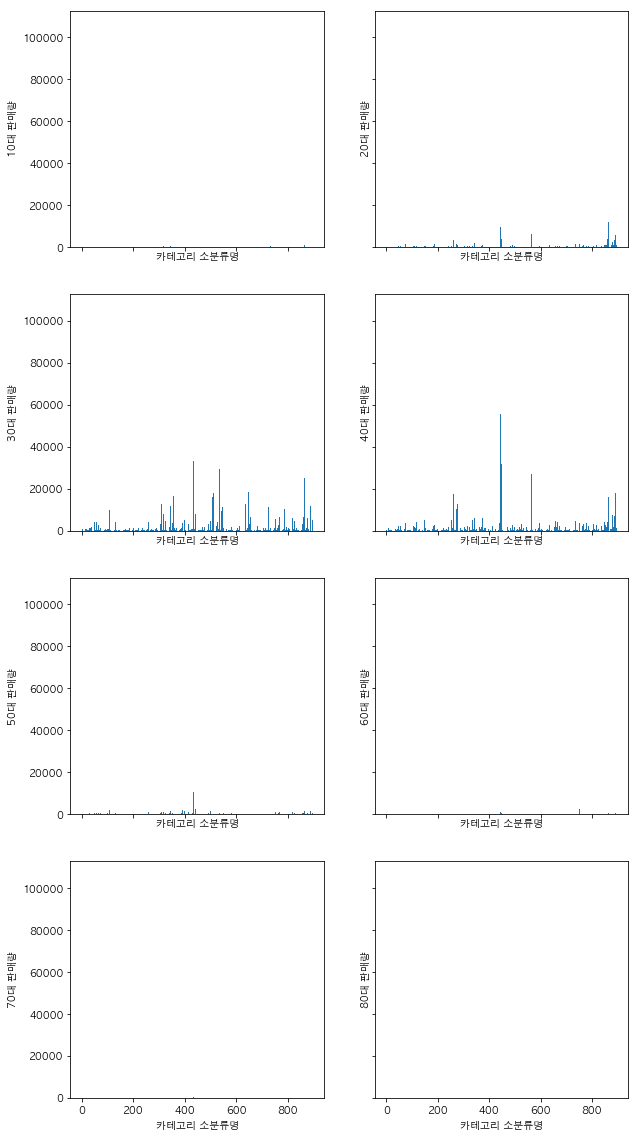

In [20]:

fig, axes = plt.subplots(4,2, figsize=(10,20), sharex=True, sharey=True)
ax = axes.ravel()
X = range(len(age))
i = 0
for ind in range(10,90,10):
    ax[i].bar(X,age['AGE%d'%ind])
    
    ax[i].set_xlabel('카테고리 소분류명')
    ax[i].set_ylabel('%d대 판매량'%ind)
    i += 1
    
pylab.savefig('소분류 연령별 판매량.png')